In [272]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [273]:
df = pd.read_csv('Mall_Customers.csv')

membaca data

In [274]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [275]:
df.rename(index=str, columns={
    'Annual Income (k$)' : 'Income',
    'Spending Score (1-100)' : 'Score'
}, inplace=True)

In [276]:
X = df.drop(['CustomerID', 'Gender'], axis=1)

In [277]:
print(X)

     Age  Income  Score
0     19      15     39
1     21      15     81
2     20      16      6
3     23      16     77
4     31      17     40
..   ...     ...    ...
195   35     120     79
196   45     126     28
197   32     126     74
198   32     137     18
199   30     137     83

[200 rows x 3 columns]


Text(0.5, 0, 'Clusters')

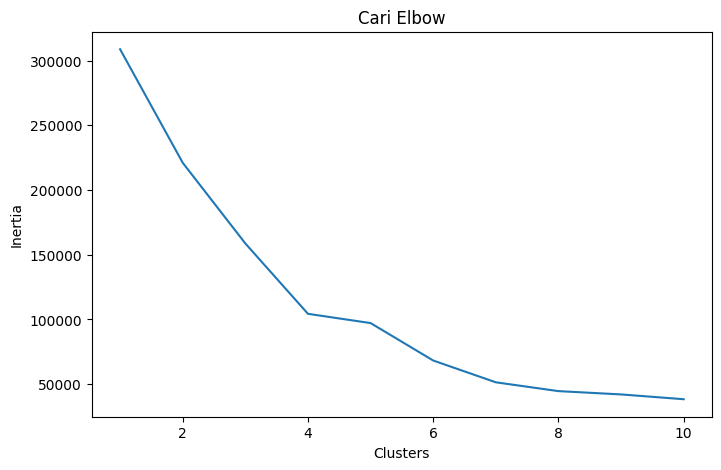

In [278]:
clusters = []
for i in range (1,11):
    km = KMeans(n_clusters=i, random_state=42).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(8,5))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_ylabel('Inertia')
ax.set_xlabel('Clusters')

# #arrow elbow 
# ax.annotate('elbow', xy=(2, 210000), xytext=(2, 50000), xycoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red'))

In [279]:
n_clust = 4
kmean = KMeans(n_clusters=n_clust).fit(X)
X['Labels'] = kmean.labels_

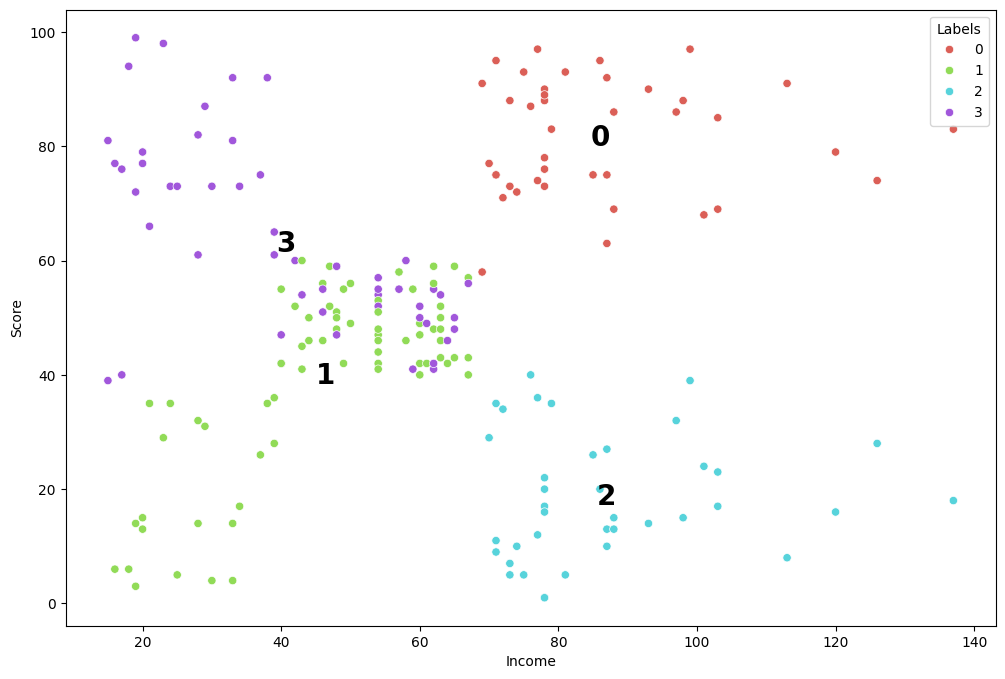

In [280]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income', y='Score', hue='Labels', data=X, palette=sns.color_palette('hls', n_clust))


for label in X['Labels'].unique():

    plt.annotate(label, 
                 (X[X['Labels'] == label]['Income'].mean(),
                  X[X['Labels'] == label]['Score'].mean()),

                 verticalalignment='center',
                 horizontalalignment='center',

                 size=20, weight='bold', 
                 color='black')


In [281]:
print(X)

     Age  Income  Score  Labels
0     19      15     39       3
1     21      15     81       3
2     20      16      6       1
3     23      16     77       3
4     31      17     40       3
..   ...     ...    ...     ...
195   35     120     79       0
196   45     126     28       2
197   32     126     74       0
198   32     137     18       2
199   30     137     83       0

[200 rows x 4 columns]


In [282]:
X.to_csv('cluster.csv', index=False)